/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36650 (\N{CJK UNIFIED IDEOGRAPH-8F2A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37101 (\N{CJK UNIFIED IDEOGRAPH-90ED}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 34920 (\N{CJK UNIFIED IDEOGRAPH-8868}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 

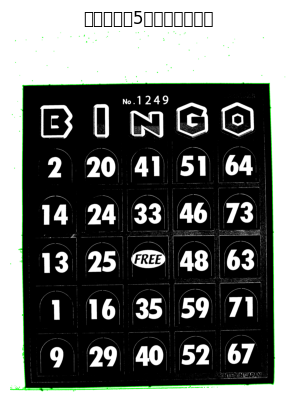

In [4]:
import cv2
import matplotlib.pyplot as plt
import time
import numpy as np

# ステップ1: 画像読み込み
image = cv2.imread("./fig/IMG_1908.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# ステップ2: 二値化（大津の手法）
_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# ステップ3: 白黒反転
binary_inverted = 255 - binary

# ステップ5: 保存（必要なら）
cv2.imwrite("binarized_bingo.png", binary_inverted)

# --- [ここまではあなたのコードと同じ] ---
img_origin = cv2.imread('binarized_bingo.png', 1)
img = cv2.bitwise_not(img_origin)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_binary = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
img_contour = cv2.drawContours(img_origin, contours, -1, (0, 255, 0), 5)

# --- [ここだけ差し替え] ---
# BGR→RGB変換（matplotlib表示用）
img_rgb = cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB)
cv2.imwrite("rinnkaku.png", img_rgb)
# 表示
plt.imshow(img_rgb)
plt.title("輪郭表示（5秒で自動終了）")
plt.axis("off")
plt.show(block=False)  # 非ブロッキング表示
plt.pause(5)           # 5秒表示
plt.close()


/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22235 (\N{CJK UNIFIED IDEOGRAPH-56DB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38533 (\N{CJK UNIFIED IDEOGRAPH-9685}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36196 (\N{CJK UNIFIED IDEOGRAPH-8D64}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/shirouta/myenv/myenv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 28857 (\

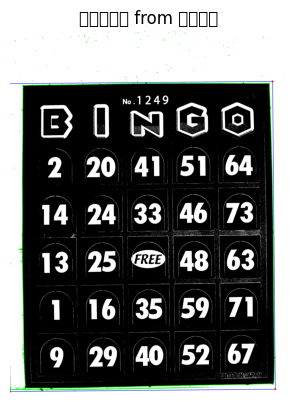

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 画像読み込み
image = cv2.imread("rinnkaku.png")

# HSVに変換して緑色をマスク
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
lower_green = np.array([50, 100, 100])
upper_green = np.array([70, 255, 255])
mask = cv2.inRange(hsv, lower_green, upper_green)

# 緑の輪郭を抽出
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
largest_contour = max(contours, key=cv2.contourArea)

# 外接矩形（4点）を取得
rect = cv2.minAreaRect(largest_contour)
box = cv2.boxPoints(rect)
box = np.array(box, dtype="int")

# 描画
image_with_corners = image.copy()
cv2.drawContours(image_with_corners, [box], 0, (255, 0, 0), 3)  # 青線（輪郭）

# 赤い点で四隅を描画
for (x, y) in box:
    cv2.circle(image_with_corners, (x, y), 10, (0, 0, 255), -1)  # 赤丸

# matplotlibで表示
plt.imshow(cv2.cvtColor(image_with_corners, cv2.COLOR_BGR2RGB))
plt.title("四隅の赤点 from 緑の輪郭")
plt.axis("off")
plt.show()


In [ ]:
# 入力画像の読み込み
image = cv2.imread("./fig/IMG_1908.jpeg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Harrisコーナー検出
dst = cv2.cornerHarris(gray, 2, 3, 0.04)

# 結果を目に見える形にするため、コーナーの強度が閾値を超えた部分を強調
image[dst > 0.01 * dst.max()] = [0, 0, 255]

# Shi-Tomasiコーナー検出
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners = corners.astype(np.intp)


# コーナーを描画
for corner in corners:
    x, y = corner.ravel()
    cv2.circle(image, (x, y), 3, (0, 255, 0), -1)

# 結果を表示
cv2.imshow("Corners", image)
cv2.waitKey(0)
cv2.destroyAllWindows()



2025-07-03 10:52:41.190 Python[70023:12129584] +[IMKClient subclass]: chose IMKClient_Modern
2025-07-03 10:52:41.190 Python[70023:12129584] +[IMKInputSession subclass]: chose IMKInputSession_Modern
